In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
#Dataset
import kagglehub
# Download latest version
path = kagglehub.dataset_download("ulrikthygepedersen/online-retail-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(f'{path}/online_retail.csv')

df.head()

Path to dataset files: /home/mathias/.cache/kagglehub/datasets/ulrikthygepedersen/online-retail-dataset/versions/2


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [80]:
invoice_counts = df['InvoiceNo'].value_counts()
top_invoice = invoice_counts.index[0]

df[df['InvoiceNo'] == top_invoice]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,2011-10-31 14:41:00,3.29,NaN,United Kingdom
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,2011-10-31 14:41:00,1.63,NaN,United Kingdom
430239,573585,15039,SANDALWOOD FAN,15,2011-10-31 14:41:00,1.63,NaN,United Kingdom
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,2011-10-31 14:41:00,12.46,NaN,United Kingdom
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,2011-10-31 14:41:00,12.46,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
431346,573585,90209C,PINK ENAMEL+GLASS HAIR COMB,3,2011-10-31 14:41:00,2.07,NaN,United Kingdom
431347,573585,90214S,"LETTER ""S"" BLING KEY RING",1,2011-10-31 14:41:00,0.83,NaN,United Kingdom
431348,573585,DOT,DOTCOM POSTAGE,1,2011-10-31 14:41:00,2019.05,NaN,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom


In [81]:
#No hace falta ni graficar para saber que hay outliers
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [82]:
def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    filtered_amount = len(df) - len(filtered_df)
    print(f'{filtered_amount / len(df) * 100} removed from {column}')
    return filtered_df

In [83]:
#mejor creo yo
df = removeOutliers(df, 'Quantity')
df = removeOutliers(df, 'UnitPrice')
df.describe()

10.817129813308139 removed from Quantity
6.718533385751827 removed from UnitPrice


,Quantity,UnitPrice,CustomerID
count,450820.000000,450820.000000,333143.000000
mean,4.768103,2.780913,15343.687104
std,4.603068,2.040645,1704.843207
min,-12.000000,0.000000,12347.000000
25%,1.000000,1.250000,14040.000000
50%,3.000000,2.100000,15281.000000
75%,7.000000,3.750000,16843.000000
max,23.000000,8.500000,18287.000000


<Axes: ylabel='Quantity'>

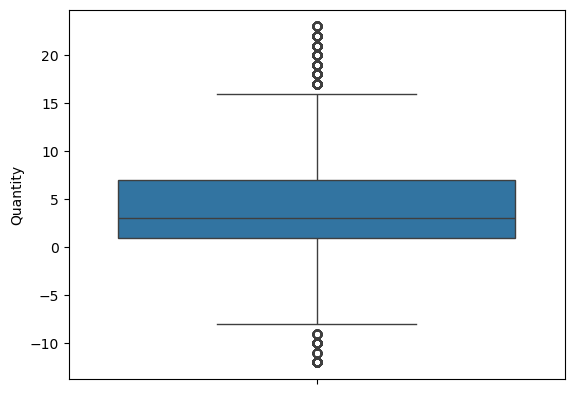

In [84]:
sns.boxplot(data= df, y='Quantity')

<Axes: ylabel='UnitPrice'>

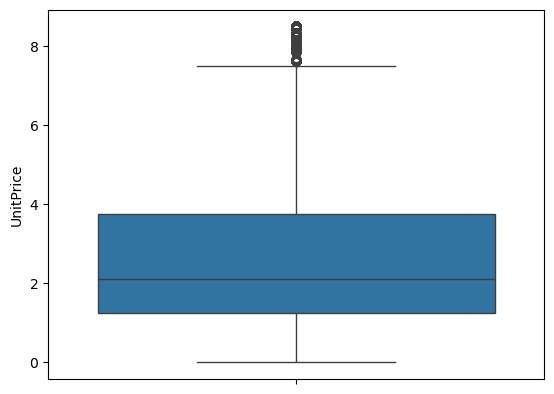

In [85]:
#ya asumo que era lavado de dinero los anteriores outliers
sns.boxplot(data= df, y='UnitPrice')

In [86]:
#Hay una NADA en description. Los elimino
df.isna().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.177898
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     26.102879
Country         0.000000
dtype: float64

In [87]:
df = df.dropna(subset=['Description'])

In [88]:
df['InvoiceDate']

0         2010-12-01 08:26:00
1         2010-12-01 08:26:00
2         2010-12-01 08:26:00
3         2010-12-01 08:26:00
4         2010-12-01 08:26:00
                 ...         
541904    2011-12-09 12:50:00
541905    2011-12-09 12:50:00
541906    2011-12-09 12:50:00
541907    2011-12-09 12:50:00
541908    2011-12-09 12:50:00
Name: InvoiceDate, Length: 450018, dtype: object

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


/tmp/ipykernel_34474/1842485062.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_sales = df.set_index('InvoiceDate').resample('M')['Quantity'].sum()


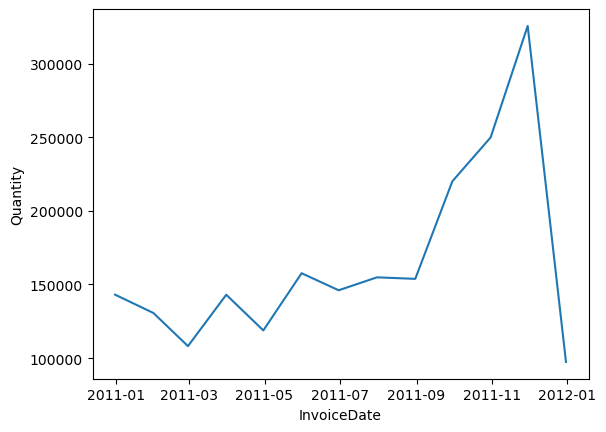

In [94]:
#se agrupa por mes y se suma
daily_sales = df.set_index('InvoiceDate').resample('M')['Quantity'].sum()

sns.lineplot(data=daily_sales)
plt.show()